In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',500)

In [2]:
df = pd.read_csv(r"C:\Users\Anil\OneDrive\Desktop\salary.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory Data Analysis

In [4]:
# Check for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [5]:
# Check for duplicated rows
df.duplicated().sum()

24

In [7]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [6]:
df = df.drop_duplicates()

In [8]:
#Replacing ? with NAN
df = df.replace(to_replace = ' ?', value = np.NaN)

In [10]:
df.shape

(32537, 15)

In [9]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
salary               0
dtype: int64

In [9]:
df.shape

(32537, 15)

In [11]:
df = df.dropna()

In [12]:
df.shape

(30139, 15)

In [13]:
categorical_features = [col for col in df.columns if df[col].dtype == 'O']
numerical_features = [col for col in df.columns if df[col].dtype != 'O']

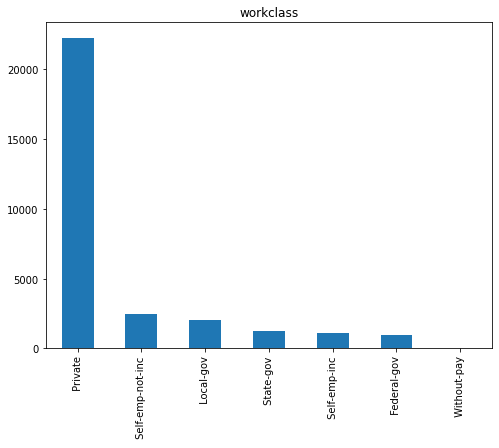

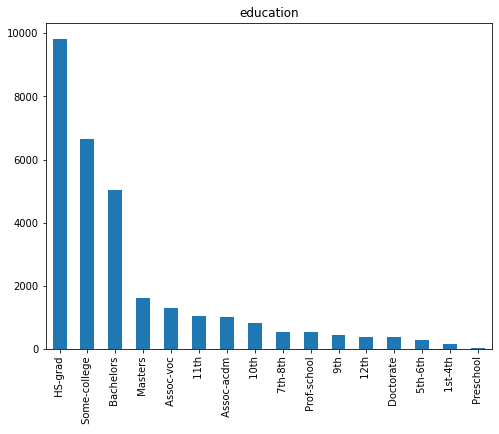

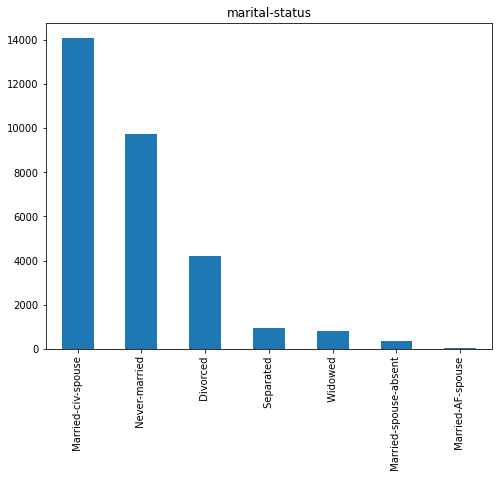

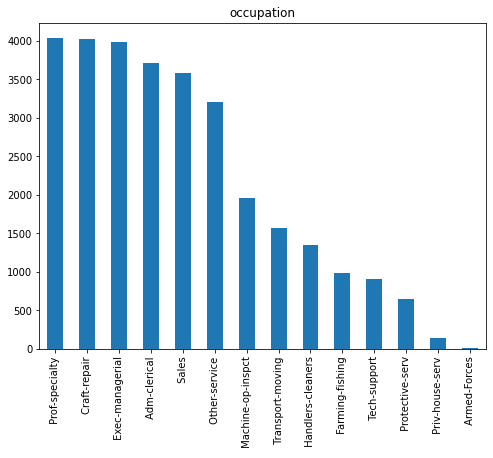

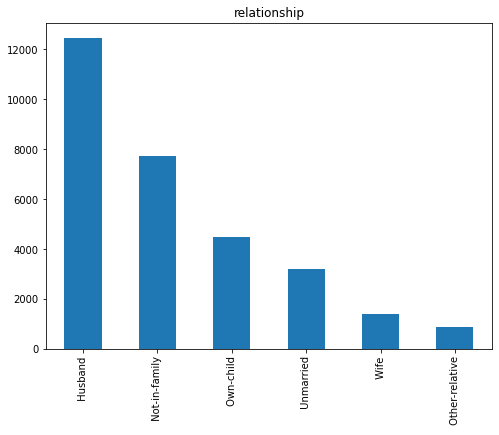

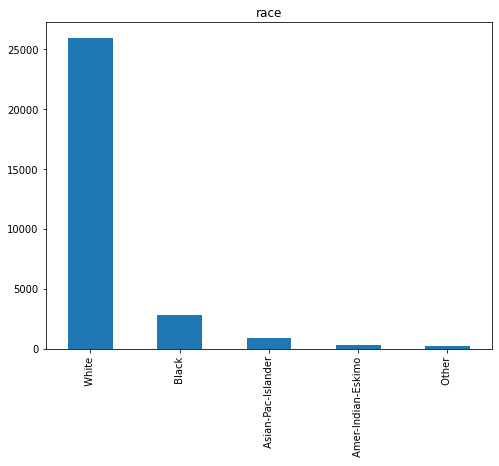

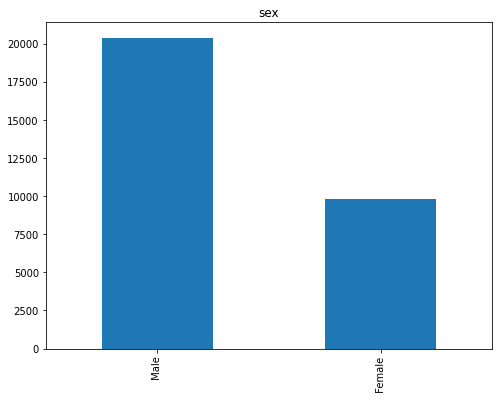

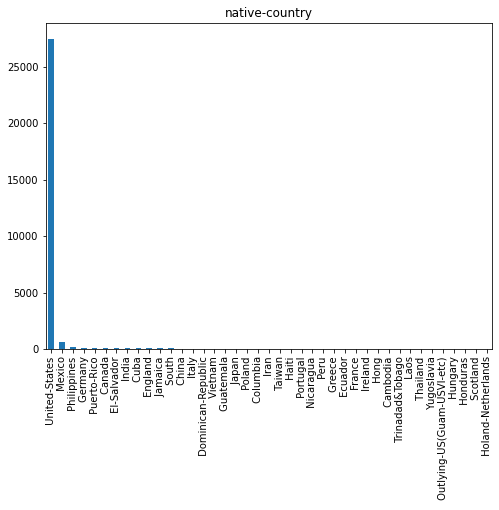

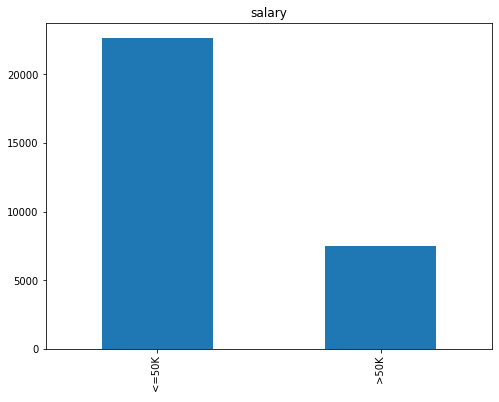

In [14]:
for i in categorical_features:
    plt.figure(figsize = (8,6))
    df[i].value_counts().sort_values(ascending = False).plot(kind = 'bar')
    plt.title(i)

In [14]:
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [16]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size = 0.25, random_state = 3)

In [18]:
y_train.head(10)

18550     <=50K
11199     <=50K
12747     <=50K
10359     <=50K
13108     <=50K
22819     <=50K
13721     <=50K
3329      <=50K
26576      >50K
25041     <=50K
Name: salary, dtype: object

In [19]:
y_test.head(10)

11178      >50K
15839      >50K
9861      <=50K
6153      <=50K
28007     <=50K
21794     <=50K
18951     <=50K
11561      >50K
31308     <=50K
12249     <=50K
Name: salary, dtype: object

## Encoding

In [19]:
X_train['workclass'] = le.fit_transform(X_train['workclass'])
X_train['education'] = le.fit_transform(X_train['education'])
X_train['occupation'] = le.fit_transform(X_train['occupation'])

In [20]:
for i in categorical_features[:-1]:
    print(X_train[i].nunique())

7
16
7
14
6
5
2
41


In [22]:
df['native-country'].nunique()

41

In [23]:
def one_hot_encoding(df,column):
    for i in df[column].value_counts().sort_values(ascending = False).index[:-1]:
        df[column+'_'+i] = np.where(df[column] == i,1,0)

In [24]:
for i in ['marital-status','relationship','race','sex']:
    one_hot_encoding(X_train,i)

In [25]:
df.shape

(30139, 15)

In [26]:
def one_hot_encoding_many(df,column):
    top_10 = [x for x in df[column].value_counts().sort_values(ascending = False).head(10).index] 
    for i in top_10:
        df[column+'_'+i] = np.where(df[column] == i,1,0)

In [27]:
one_hot_encoding_many(X_train,'native-country')

In [28]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,marital-status_ Married-civ-spouse,marital-status_ Never-married,marital-status_ Divorced,marital-status_ Separated,marital-status_ Widowed,marital-status_ Married-spouse-absent,relationship_ Husband,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ White,race_ Black,race_ Asian-Pac-Islander,race_ Amer-Indian-Eskimo,sex_ Male,native-country_ United-States,native-country_ Mexico,native-country_ Philippines,native-country_ Germany,native-country_ Puerto-Rico,native-country_ Canada,native-country_ India,native-country_ Cuba,native-country_ El-Salvador,native-country_ England
18550,54,0,230387,11,9,Widowed,0,Unmarried,White,Female,0,0,35,United-States,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11199,38,5,341643,7,12,Never-married,3,Not-in-family,White,Male,0,0,60,United-States,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
12747,30,2,280069,15,10,Never-married,11,Not-in-family,White,Female,0,0,48,United-States,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10359,32,2,183811,11,9,Married-civ-spouse,5,Husband,White,Male,2829,0,40,United-States,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
13108,37,1,52465,11,9,Never-married,7,Not-in-family,White,Male,0,0,40,United-States,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [29]:
X_train = X_train.drop(['workclass','education','occupation','marital-status','relationship','race','sex','native-country'],axis = 1)

In [30]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_ Married-civ-spouse,marital-status_ Never-married,marital-status_ Divorced,marital-status_ Separated,marital-status_ Widowed,marital-status_ Married-spouse-absent,relationship_ Husband,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ White,race_ Black,race_ Asian-Pac-Islander,race_ Amer-Indian-Eskimo,sex_ Male,native-country_ United-States,native-country_ Mexico,native-country_ Philippines,native-country_ Germany,native-country_ Puerto-Rico,native-country_ Canada,native-country_ India,native-country_ Cuba,native-country_ El-Salvador,native-country_ England
18550,54,230387,9,0,0,35,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11199,38,341643,12,0,0,60,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
12747,30,280069,10,0,0,48,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10359,32,183811,9,2829,0,40,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
13108,37,52465,9,0,0,40,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16517,31,198069,9,0,0,24,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
28333,61,29059,9,0,2754,25,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12456,31,38223,13,0,0,45,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1836,58,312131,14,0,0,40,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [31]:
X_test['workclass'] = le.fit_transform(X_test['workclass'])
X_test['education'] = le.fit_transform(X_test['education'])
X_test['occupation'] = le.fit_transform(X_test['occupation'])

In [32]:
for i in ['marital-status','relationship','race','sex']:
    one_hot_encoding(X_test,i)

In [33]:
one_hot_encoding_many(X_test,'native-country')

## Feature Selection

<AxesSubplot:>

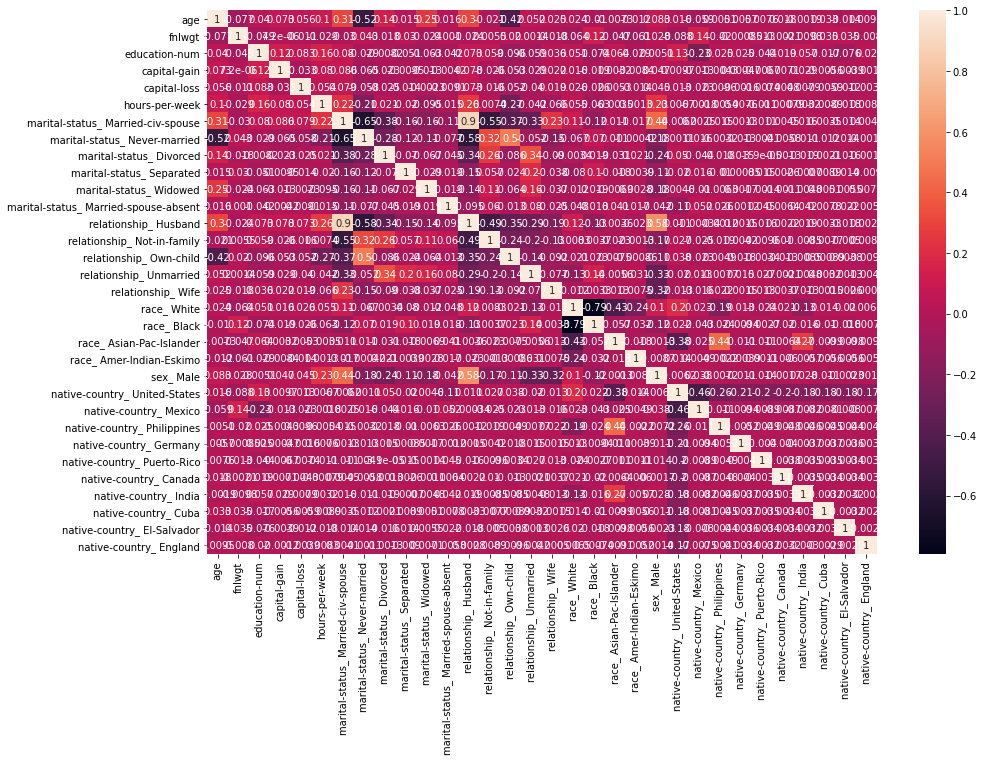

In [34]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(X_train.corr(),annot = True)

In [36]:
def correlation(dataset,threshold):
    correlated_columns = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                correlated_columns.append(corr_matrix.columns[i])
    return correlated_columns

In [37]:
correlation(X_train,0.8)

['relationship_ Husband']

In [ ]:
X_train = X_train.drop('relationship_ Husband',axis = 1)

In [40]:
y_train = pd.Series(le.fit_transform(y_train))
y_test = pd.Series(le.fit_transform(y_test))

In [41]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
22599    0
22600    0
22601    0
22602    0
22603    1
Length: 22604, dtype: int32

In [42]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.06823767, 0.02227464, 0.06610454, 0.08409022, 0.03829491,
       0.04309981, 0.10743793, 0.06259135, 0.00713591, 0.        ,
       0.00336655, 0.00137953, 0.02125448, 0.04309387, 0.0118814 ,
       0.01149269, 0.00368613, 0.00182233, 0.00201687, 0.        ,
       0.02811476, 0.00971107, 0.00154748, 0.        , 0.        ,
       0.        , 0.00042691, 0.00208982, 0.00209884, 0.00200661,
       0.        ])

In [44]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
cols = mutual_info.sort_values(ascending = False).head(15).index

In [45]:
X_train = X_train[cols]

In [46]:
X_test = X_test.drop('relationship_ Husband',axis = 1)

In [47]:
X_test = X_test[cols]

## Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [49]:
X_train.head()

,marital-status_ Married-civ-spouse,capital-gain,age,education-num,marital-status_ Never-married,hours-per-week,relationship_ Own-child,capital-loss,sex_ Male,fnlwgt,relationship_ Not-in-family,relationship_ Unmarried,relationship_ Wife,native-country_ United-States,marital-status_ Divorced
18550,0,0,54,9,0,35,0,0,0,230387,0,1,0,1,0
11199,0,0,38,12,1,60,0,0,1,341643,1,0,0,1,0
12747,0,0,30,10,1,48,0,0,0,280069,1,0,0,1,0
10359,1,2829,32,9,0,40,0,0,1,183811,0,0,0,1,0
13108,0,0,37,9,1,40,0,0,1,52465,1,0,0,1,0


c:\anil\hrithik\programming\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\anil\hrithik\programming\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\anil\hrithik\programming\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

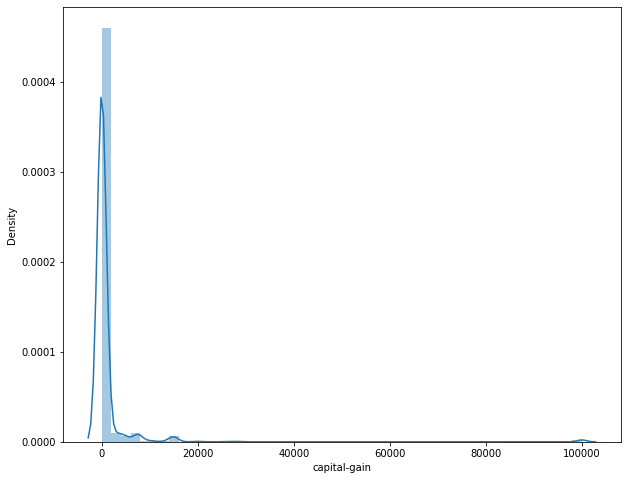

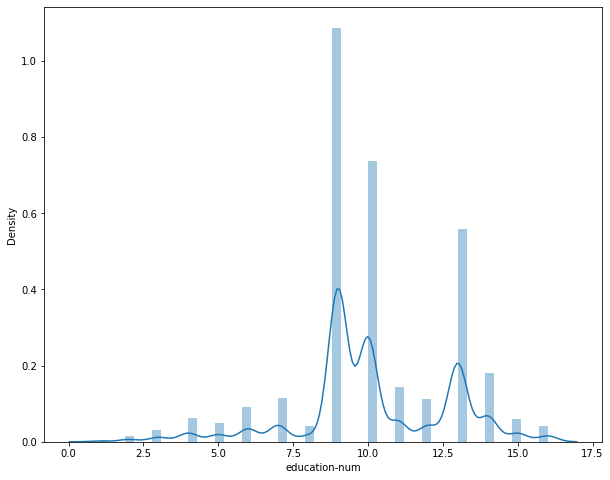

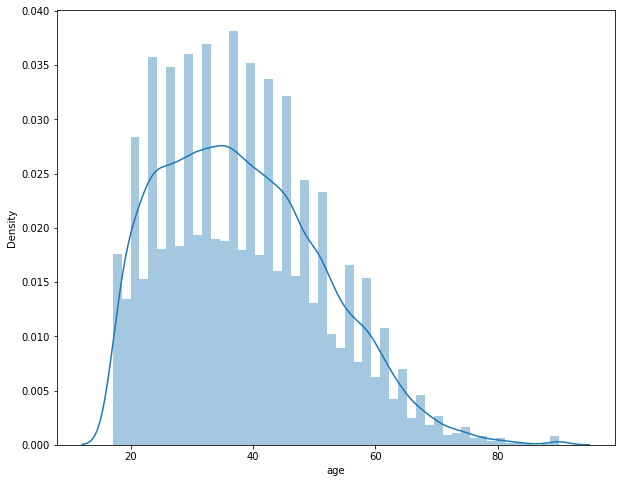

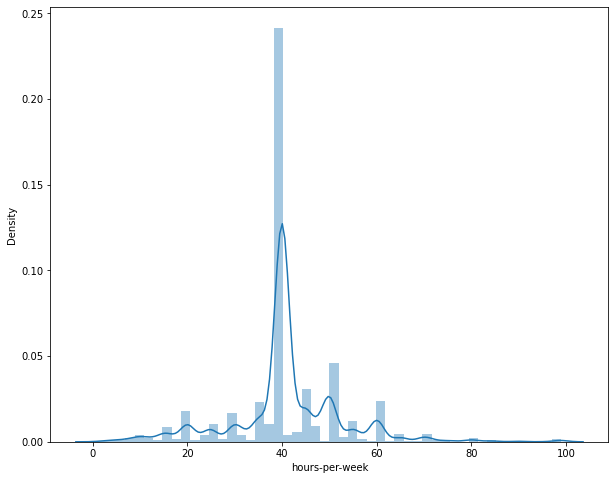

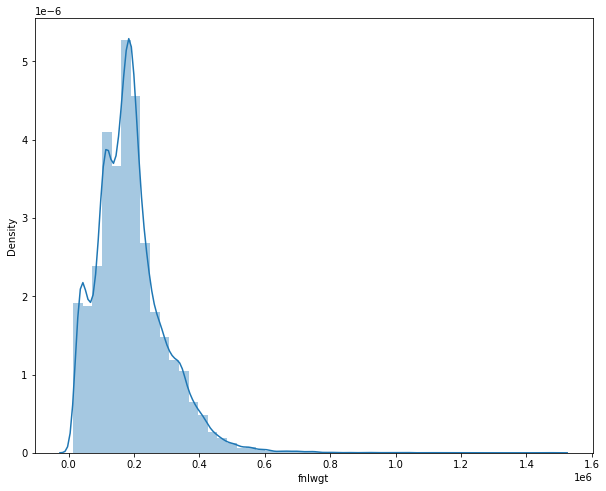

In [50]:
# Capital gain, Age, Education-num,hours-per-week,fnlwgt
to_be_scaled = ['capital-gain', 'education-num','age', 'hours-per-week', 'fnlwgt']
for i in to_be_scaled:
    plt.figure(figsize = (10,8))
    sns.distplot(df[i])

In [51]:
X_train_minmax = min_max_scaler.fit_transform(X_train[to_be_scaled])

In [53]:
X_train_minmax

array([[0.        , 0.53333333, 0.50684932, 0.34693878, 0.14726541],
       [0.        , 0.73333333, 0.28767123, 0.60204082, 0.22290161],
       [0.        , 0.6       , 0.17808219, 0.47959184, 0.18104119],
       ...,
       [0.        , 0.8       , 0.19178082, 0.44897959, 0.01662479],
       [0.        , 0.86666667, 0.56164384, 0.39795918, 0.20283819],
       [0.        , 0.8       , 0.16438356, 0.39795918, 0.18122814]])

In [54]:
X_train_minmax_df = pd.DataFrame(X_train_minmax, columns = ['capital-gain_scaled', 'education-num_scaled','age_scaled', 'hours-per-week_scaled', 'fnlwgt_scaled'])

In [55]:
X_train = X_train.reset_index(drop=True).merge(X_train_minmax_df.reset_index(drop=True), left_index=True, right_index=True)

In [56]:
X_train.head()

,marital-status_ Married-civ-spouse,capital-gain,age,education-num,marital-status_ Never-married,hours-per-week,relationship_ Own-child,capital-loss,sex_ Male,fnlwgt,relationship_ Not-in-family,relationship_ Unmarried,relationship_ Wife,native-country_ United-States,marital-status_ Divorced,capital-gain_scaled,education-num_scaled,age_scaled,hours-per-week_scaled,fnlwgt_scaled
0,0,0,54,9,0,35,0,0,0,230387,0,1,0,1,0,0.00000,0.533333,0.506849,0.346939,0.147265
1,0,0,38,12,1,60,0,0,1,341643,1,0,0,1,0,0.00000,0.733333,0.287671,0.602041,0.222902
2,0,0,30,10,1,48,0,0,0,280069,1,0,0,1,0,0.00000,0.600000,0.178082,0.479592,0.181041
3,1,2829,32,9,0,40,0,0,1,183811,0,0,0,1,0,0.02829,0.533333,0.205479,0.397959,0.115601
4,0,0,37,9,1,40,0,0,1,52465,1,0,0,1,0,0.00000,0.533333,0.273973,0.397959,0.026307


In [57]:
X_train = X_train.drop(['capital-gain', 'education-num','age', 'hours-per-week', 'fnlwgt'],axis = 1)

In [58]:
X_test_minmax = min_max_scaler.fit_transform(X_test[to_be_scaled])

In [59]:
X_test_minmax_df = pd.DataFrame(X_test_minmax, columns = ['capital-gain_scaled', 'education-num_scaled','age_scaled', 'hours-per-week_scaled', 'fnlwgt_scaled'])

In [60]:
X_test = X_test.reset_index(drop=True).merge(X_test_minmax_df.reset_index(drop=True), left_index=True, right_index=True)

In [61]:
X_test = X_test.drop(['capital-gain', 'education-num','age', 'hours-per-week', 'fnlwgt'],axis = 1)

## Model Creation

In [62]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import recall_score,accuracy_score

In [63]:
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

In [64]:
logistic_regression.fit(X_train,y_train)

c:\anil\hrithik\programming\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_pred = logistic_regression.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.8234903782349038


In [58]:
param_dict = {"criterion":["gini", "entropy", "log_loss"],"splitter":["best","random"],"max_depth":[1,2,3,4,5,6]}
grid_tree = GridSearchCV(decision_tree,param_grid = param_dict,cv = 10, n_jobs = -1)
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [59]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}
0.8486986140520484


In [60]:
print(cross_val_score(grid_tree,X_train,y_train,cv = 10,scoring = 'accuracy').mean())

0.8484332447464314


In [61]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 30)]
criterion = ['gini','entropy','log_loss']
max_depth = [1,2,3,4]
bootstrap = [True,False]
param_grid = {'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth,'bootstrap':bootstrap}
grid_forest = GridSearchCV(random_forest,param_grid = param_grid,cv = 10, n_jobs = -1)
grid_forest.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [10, 10, 10, 11, 11, 12, 12, 12, 13,
                                          13, 14, 14, 14, 15, 15, 16, 16, 16,
                                          17, 17, 18, 18, 18, 19, 19, 20, 20,
                                          21, 21, 21, ...]})

In [62]:
print(grid_forest.best_params_)
print(grid_forest.best_score_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'n_estimators': 28}
0.8432572516663862


In [65]:
param_dict = {"criterion":["friedman_mse", "squared_error", "mse"],"loss":["log_loss","deviance","exponential"],"n_estimators": [int(x) for x in np.linspace(start = 5, stop = 20)]}
grid = GridSearchCV(gradient_boosting,param_grid = param_dict,cv = 10, n_jobs = -1)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'n_estimators': [5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8,
                                          8, 9, 9, 9, 10, 10, 10, 11, 11, 11,
                                          12, 12, 12, 12, 13, 13, 13, ...]})

In [66]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'friedman_mse', 'loss': 'deviance', 'n_estimators': 20}
0.8443629179664415


In [72]:
y_pred_tree = grid_tree.predict(X_test)
y_pred_forest = grid_forest.predict(X_test)
y_pred_gradient = grid.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred_tree))
print(accuracy_score(y_test,y_pred_forest))
print(accuracy_score(y_test,y_pred_gradient))

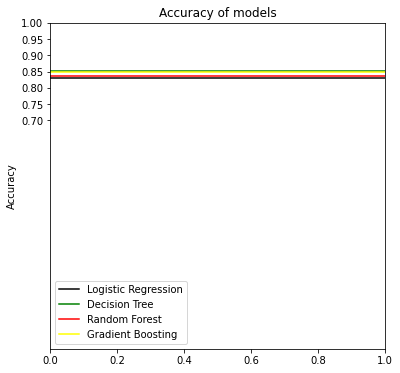

In [96]:
#Making a graph showing accuracy
plt.figure(figsize = (6,6))
plt.axhline(accuracy_score(y_test,y_pred),color = 'black', label = 'Logistic Regression')
plt.axhline(accuracy_score(y_test,y_pred_tree),color = 'green', label = 'Decision Tree')
plt.axhline(accuracy_score(y_test,y_pred_forest),color = 'red', label = 'Random Forest')
plt.axhline(accuracy_score(y_test,y_pred_gradient),color = 'yellow', label = 'Gradient Boosting')
plt.title('Accuracy of models')
plt.ylabel('Accuracy')
plt.legend()
plt.yticks(np.arange(0.70,1.0,0.05))
plt.show()